In [90]:
import pandas as pd
data=pd.read_csv("data.csv")

In [91]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [92]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [93]:
data = data.replace({'?':np.NaN})


In [94]:
data.isnull().sum()


age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [95]:
data.drop('ca', axis=1, inplace=True)


In [96]:
data.fillna(data.median(), inplace=True)


In [97]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num       '],
      dtype='object')

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = data.rename(columns={"num       ":"num"})


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


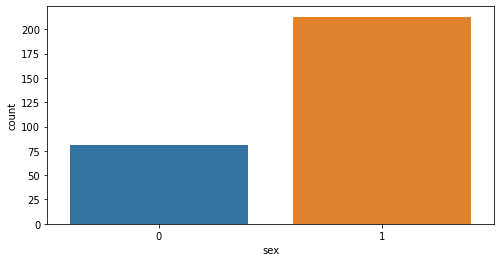

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


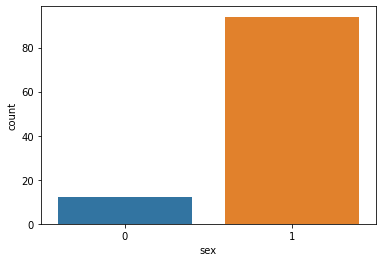

In [100]:
plt.figure(figsize=(8,4))
sns.countplot(data.sex)
plt.show()
sns.countplot(data.sex[data['num']==1])
plt.show()

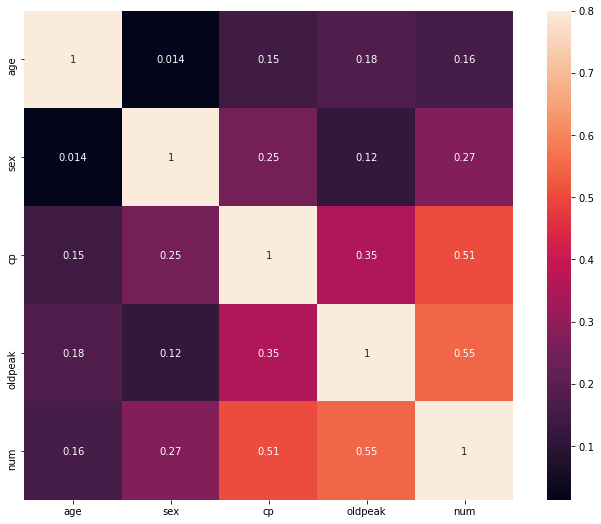

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);


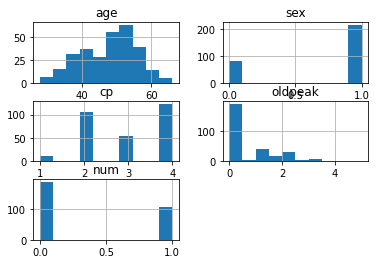

<Figure size 1440x864 with 0 Axes>

In [102]:
data.hist()
plt.figure(figsize=(20,12))
plt.show()

In [103]:
from sklearn.model_selection import train_test_split


In [104]:
X = data.drop('num', axis=1)
y = data['num']


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)


In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [107]:
from sklearn.linear_model import LogisticRegression


In [108]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['age', 'cp','trestbps']]
y = data['sex']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

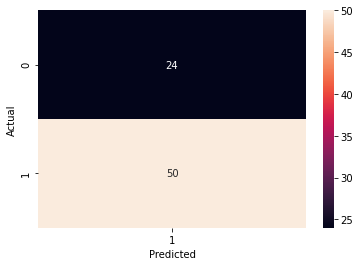

In [110]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [112]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500,random_state=1)
model.fit(x_train,y_train)
rfpred=model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, rfpred)
rf_acc_score = accuracy_score(y_test, rfpred)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(RF_conf_matrix)
print(classification_report(y_test, rfpred))
print("\n")
print("Accuracy of Random Forest Classifier: {:.3f}".format(rf_acc_score*100),'%\n')

NameError: name 'X_test' is not defined